In [5]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.4/881.4 kB 14.1 MB/s eta 0:00:00


In [6]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
!pip install ultralytics torch torchvision

# Först måste skapa folder för train och valid för man kan inte uploadera folder

In [ ]:
!mkdir -p /content/datasets/train/images
!mkdir -p /content/datasets/train/labels
!mkdir -p /content/datasets/valid/images
!mkdir -p /content/datasets/valid/labels

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Colab\ Notebooks/train.zip -d /content/datasets/


Streaming output truncated to the last 5000 lines.
  inflating: /content/datasets/train/images/2012-11-11_07_08_48_jpg.rf.c5c771fa2a6130277a680720482fa0bf.jpg  
  inflating: /content/datasets/train/images/2012-11-11_07_13_48_jpg.rf.b3af01fabd121d98f1ed9b0417d419ef.jpg  
  inflating: /content/datasets/train/images/2012-11-11_07_18_48_jpg.rf.728d0c4621bb470b9abf7cc17e736440.jpg  
  inflating: /content/datasets/train/images/2012-11-11_07_23_48_jpg.rf.c103b174316b697b327b24814a1be955.jpg  
  inflating: /content/datasets/train/images/2012-11-11_07_28_49_jpg.rf.863891e8139983673a5435bc11dd970b.jpg  
  inflating: /content/datasets/train/images/2012-11-11_07_33_49_jpg.rf.48fa25285495e85339ae08e5ddecca18.jpg  
  inflating: /content/datasets/train/images/2012-11-11_07_38_49_jpg.rf.067db8f1e1fb391e47f1d8a61e85b490.jpg  
  inflating: /content/datasets/train/images/2012-11-11_07_58_50_jpg.rf.3a0547fd84639ddabc289212939f7b40.jpg  
  inflating: /content/datasets/train/images/2012-11-11_08_03_50_jpg.r

In [ ]:
# to confirm that the files are extracted correctly
!ls /content/dataset/train/labels


2012-09-11_15_16_58_jpg.rf.0975fa50f564b303a25de1679a0e5c30.txt
2012-09-11_15_27_08_jpg.rf.4614f1f3178b709ae297499c9e448e09.txt
2012-09-11_15_29_29_jpg.rf.c1a3243bb35ca8aabfe8ab25a61d6353.txt
2012-09-11_15_31_50_jpg.rf.bf804e397aa1087dc11ee2a6d75d5386.txt
2012-09-11_15_38_53_jpg.rf.b23f896107373ea0c6d88417173e9ef1.txt
2012-09-11_15_43_35_jpg.rf.3dd996602206be911fac13bd9422ff7a.txt
2012-09-11_15_55_21_jpg.rf.f3342de11df07d5116da804d70af8683.txt
2012-09-11_16_02_25_jpg.rf.b472c069be0ea3d400199963202f87ae.txt
2012-09-11_16_10_41_jpg.rf.75268b293b287350e273f6d8be6052d5.txt
2012-09-11_16_15_24_jpg.rf.394adff7deef852065347647d7ce78ac.txt
2012-09-11_16_20_06_jpg.rf.d4f0bb1184719e932af48a16494150be.txt
2012-09-11_16_24_53_jpg.rf.ade53ad4ba1869475434739d4d1fa7c0.txt
2012-09-11_16_29_30_jpg.rf.94841f2e77fd040113c009182e35918e.txt
2012-09-11_16_34_18_jpg.rf.e89e0054a71ccbdd26866df5cc1ee584.txt
2012-09-11_16_38_55_jpg.rf.188d461f0029bdb28a27e149306bcf8d.txt
2012-09-11_16_43_43_jpg.rf.5a27d7432526c

In [ ]:
!unzip /content/drive/MyDrive/Colab\ Notebooks/valid.zip -d /content/datasets


Archive:  /content/drive/MyDrive/Colab Notebooks/valid.zip
  inflating: /content/datasets/valid/images/2012-09-11_15_36_32_jpg.rf.1c49865cad8ca2f970a1048ae0ebef79.jpg  
  inflating: /content/datasets/valid/images/2012-09-11_15_45_57_jpg.rf.b92315beb98866401fb1699ceb0bd94d.jpg  
  inflating: /content/datasets/valid/images/2012-09-11_17_12_07_jpg.rf.f745bdbeafad795bf99aa6275e711f1d.jpg  
  inflating: /content/datasets/valid/images/2012-09-11_17_31_01_jpg.rf.9005a91e286d0219dd12768eb1294c01.jpg  
  inflating: /content/datasets/valid/images/2012-09-11_17_35_44_jpg.rf.2cd4b51c3c4042ee70f663dfcde8ac09.jpg  
  inflating: /content/datasets/valid/images/2012-09-11_17_59_15_jpg.rf.2017c53a0fb4fce70c717f07824b70c8.jpg  
  inflating: /content/datasets/valid/images/2012-09-11_18_03_58_jpg.rf.27f7930be38a431a9d790a56f20c11b5.jpg  
  inflating: /content/datasets/valid/images/2012-09-11_18_08_41_jpg.rf.a281cf7cfc77c6cf6ee571bef499f78c.jpg  
  inflating: /content/datasets/valid/images/2012-09-12_06_26_

In [ ]:
# Load the model
model = YOLO('yolov10n.pt')

100%|██████████| 5.59M/5.59M [00:00<00:00, 20.4MB/s]


In [ ]:
# Train the model
results = model.train(
    data='data3.yaml',
    imgsz=448,
    epochs=40,
    batch=8,
    save_period=1,
    name='yolov10n_park_40e'
)

Ultralytics 8.3.3 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov10n.pt, data=data3.yaml, epochs=40, time=None, patience=100, batch=8, imgsz=448, save=True, save_period=1, cache=False, device=None, workers=8, project=None, name=yolov10n_park_40e, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True,

100%|██████████| 755k/755k [00:00<00:00, 4.30MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1      9856  ultralytics.nn.modules.block.SCDown          [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1     36096  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 19.6MB/s]


AMP: checks passed ✅


train: Scanning /content/datasets/train/labels... 3997 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3997/3997 [00:03<00:00, 1322.90it/s]


train: New cache created: /content/datasets/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.17 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/datasets/valid/labels... 2483 images, 59 backgrounds, 0 corrupt: 100%|██████████| 2483/2483 [00:02<00:00, 1093.32it/s]


val: New cache created: /content/datasets/valid/labels.cache
Plotting labels to runs/detect/yolov10n_park_40e/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 95 weight(decay=0.0), 108 weight(decay=0.0005), 107 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 448 train, 448 val
Using 2 dataloader workers
Logging results to runs/detect/yolov10n_park_40e
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      1.83G      3.367      3.276      1.879        574        448: 100%|██████████| 500/500 [01:58<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 156/156 [00:30<00:00,  5.17it/s]


                   all       2483     143316      0.796      0.695      0.786      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      1.68G       2.43      1.427      1.704        881        448: 100%|██████████| 500/500 [01:48<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 156/156 [00:29<00:00,  5.34it/s]


                   all       2483     143316      0.813      0.744      0.833      0.548

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      1.78G      2.201      1.219      1.672        502        448: 100%|██████████| 500/500 [01:48<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 156/156 [00:29<00:00,  5.28it/s]


                   all       2483     143316      0.859      0.744      0.826      0.551

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40      2.31G       2.07       1.12      1.659        573        448: 100%|██████████| 500/500 [01:48<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 156/156 [00:29<00:00,  5.36it/s]


                   all       2483     143316      0.848      0.721       0.82      0.579

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40      1.88G      1.965      1.055      1.644        831        448: 100%|██████████| 500/500 [01:49<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 156/156 [00:28<00:00,  5.41it/s]


                   all       2483     143316      0.902      0.765      0.849      0.584

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40      2.02G       1.87     0.9861      1.635        636        448: 100%|██████████| 500/500 [01:48<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 156/156 [00:27<00:00,  5.61it/s]


                   all       2483     143316      0.905      0.759      0.845      0.623

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40      2.47G      1.776     0.9277      1.625        800        448: 100%|██████████| 500/500 [01:47<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 156/156 [00:26<00:00,  5.99it/s]


                   all       2483     143316      0.891      0.781      0.837      0.623

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40       2.2G      1.724     0.8833      1.619        967        448: 100%|██████████| 500/500 [01:47<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 156/156 [00:25<00:00,  6.20it/s]


                   all       2483     143316      0.915        0.8      0.873      0.659

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40      1.89G      1.651     0.8553      1.613        433        448: 100%|██████████| 500/500 [01:51<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 156/156 [00:25<00:00,  6.05it/s]


                   all       2483     143316      0.916      0.792      0.867      0.656

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40      2.21G      1.582     0.8208      1.608       1053        448: 100%|██████████| 500/500 [01:51<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 156/156 [00:25<00:00,  6.06it/s]


                   all       2483     143316      0.905      0.785      0.855      0.649

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40      2.46G      1.536     0.7915      1.606        521        448: 100%|██████████| 500/500 [01:51<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 156/156 [00:25<00:00,  6.08it/s]


                   all       2483     143316      0.924      0.783      0.856      0.673

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40      1.48G      1.501     0.7888      1.601        817        448: 100%|██████████| 500/500 [01:49<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 156/156 [00:25<00:00,  6.01it/s]


                   all       2483     143316      0.928      0.772      0.859      0.676

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40      1.62G      1.499      0.745        1.6        727        448: 100%|██████████| 500/500 [01:50<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 156/156 [00:27<00:00,  5.65it/s]


                   all       2483     143316      0.924      0.801      0.885      0.691

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      2.32G      1.422     0.7179      1.594        823        448: 100%|██████████| 500/500 [01:48<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 156/156 [00:29<00:00,  5.27it/s]


                   all       2483     143316      0.925      0.797      0.872      0.686

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40      1.81G      1.436     0.7141      1.595        843        448: 100%|██████████| 500/500 [01:47<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 156/156 [00:28<00:00,  5.40it/s]


                   all       2483     143316      0.914      0.799      0.872       0.69

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40      1.64G      1.386     0.6903      1.591        819        448: 100%|██████████| 500/500 [01:53<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 156/156 [00:27<00:00,  5.70it/s]


                   all       2483     143316      0.932      0.799       0.88      0.722

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40      1.51G      1.366     0.6696      1.589        570        448: 100%|██████████| 500/500 [01:52<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 156/156 [00:27<00:00,  5.63it/s]


                   all       2483     143316      0.929       0.79      0.874      0.711

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40      1.83G      1.327     0.6589      1.585        483        448: 100%|██████████| 500/500 [01:51<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 156/156 [00:28<00:00,  5.55it/s]


                   all       2483     143316      0.941      0.768      0.856      0.708

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40      2.68G      1.332     0.6476      1.588        529        448: 100%|██████████| 500/500 [01:49<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 156/156 [00:29<00:00,  5.28it/s]


                   all       2483     143316      0.921      0.815       0.89      0.724

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40      1.68G       1.29     0.6202      1.586        817        448: 100%|██████████| 500/500 [01:49<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 156/156 [00:27<00:00,  5.75it/s]


                   all       2483     143316      0.924      0.813      0.892      0.733

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40      2.01G      1.246     0.6077      1.581        947        448: 100%|██████████| 500/500 [01:46<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 156/156 [00:25<00:00,  6.19it/s]


                   all       2483     143316      0.922      0.803       0.88      0.734

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40       2.5G      1.241     0.5966       1.58        822        448: 100%|██████████| 500/500 [01:47<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 156/156 [00:26<00:00,  5.97it/s]


                   all       2483     143316      0.929      0.795      0.878       0.73

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40      2.19G      1.205      0.584      1.578        984        448: 100%|██████████| 500/500 [01:47<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 156/156 [00:28<00:00,  5.41it/s]


                   all       2483     143316      0.923      0.789      0.869      0.726

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40      2.24G      1.185     0.5792      1.577        691        448: 100%|██████████| 500/500 [01:47<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 156/156 [00:28<00:00,  5.51it/s]


                   all       2483     143316      0.924      0.806      0.883      0.734

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40      1.74G      1.207     0.5851      1.579        649        448: 100%|██████████| 500/500 [01:47<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 156/156 [00:28<00:00,  5.39it/s]


                   all       2483     143316      0.935      0.794      0.881      0.748

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40         2G      1.173     0.5868      1.575        739        448: 100%|██████████| 500/500 [01:48<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 156/156 [00:27<00:00,  5.62it/s]


                   all       2483     143316      0.925      0.807       0.88       0.74

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40      2.24G      1.162     0.5617      1.575        683        448: 100%|██████████| 500/500 [01:47<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 156/156 [00:24<00:00,  6.38it/s]


                   all       2483     143316      0.934      0.798      0.877      0.736

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40      2.63G       1.14     0.5451      1.576       1097        448: 100%|██████████| 500/500 [01:47<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 156/156 [00:25<00:00,  6.14it/s]


                   all       2483     143316      0.938      0.811      0.891      0.758

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40      1.88G      1.091     0.5318      1.573        843        448: 100%|██████████| 500/500 [01:45<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 156/156 [00:27<00:00,  5.67it/s]


                   all       2483     143316      0.933      0.808      0.888      0.757

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40      1.62G      1.076     0.5268      1.573        746        448: 100%|██████████| 500/500 [01:47<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 156/156 [00:26<00:00,  5.79it/s]


                   all       2483     143316      0.931      0.804      0.888      0.759
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40     0.933G      0.942     0.4656      1.557        500        448: 100%|██████████| 500/500 [01:39<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 156/156 [00:27<00:00,  5.60it/s]


                   all       2483     143316      0.927      0.809      0.891      0.765

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40     0.942G     0.9073     0.4479      1.554        490        448: 100%|██████████| 500/500 [01:39<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 156/156 [00:25<00:00,  6.17it/s]


                   all       2483     143316      0.925      0.819      0.893      0.771

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40     0.933G     0.8718     0.4393      1.553        492        448: 100%|██████████| 500/500 [01:40<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 156/156 [00:24<00:00,  6.36it/s]


                   all       2483     143316      0.934      0.811      0.893      0.771

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40     0.942G     0.8608     0.4318      1.552        356        448: 100%|██████████| 500/500 [01:39<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 156/156 [00:26<00:00,  5.95it/s]


                   all       2483     143316      0.932      0.808      0.889      0.775

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40     0.931G     0.8292      0.422      1.549        428        448: 100%|██████████| 500/500 [01:38<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 156/156 [00:26<00:00,  5.83it/s]


                   all       2483     143316      0.925      0.816      0.894      0.776

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40     0.942G     0.8236     0.4229      1.551        493        448: 100%|██████████| 500/500 [01:36<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 156/156 [00:28<00:00,  5.53it/s]


                   all       2483     143316      0.931      0.815      0.894       0.78

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40     0.931G     0.7952     0.4063       1.55        356        448: 100%|██████████| 500/500 [01:36<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 156/156 [00:28<00:00,  5.55it/s]


                   all       2483     143316      0.928      0.816      0.893      0.781

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40      0.94G     0.7762     0.4002      1.548        284        448: 100%|██████████| 500/500 [01:38<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 156/156 [00:27<00:00,  5.68it/s]


                   all       2483     143316       0.93      0.821      0.897      0.785

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40     0.931G     0.7683     0.3964      1.545        495        448: 100%|██████████| 500/500 [01:39<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 156/156 [00:24<00:00,  6.25it/s]


                   all       2483     143316      0.932      0.818      0.896      0.789

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40     0.942G     0.7413     0.3874      1.547        423        448: 100%|██████████| 500/500 [01:44<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 156/156 [00:28<00:00,  5.50it/s]


                   all       2483     143316      0.932      0.818      0.897      0.789

40 epochs completed in 1.509 hours.
Optimizer stripped from runs/detect/yolov10n_park_40e/weights/last.pt, 5.7MB
Optimizer stripped from runs/detect/yolov10n_park_40e/weights/best.pt, 5.7MB

Validating runs/detect/yolov10n_park_40e/weights/best.pt...
Ultralytics 8.3.3 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10n summary (fused): 285 layers, 2,695,196 parameters, 0 gradients, 8.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 156/156 [00:49<00:00,  3.13it/s]


                   all       2483     143316      0.931      0.818      0.897      0.789
           space-empty       2062      73629      0.926      0.847      0.906      0.827
        space-occupied       1967      69687      0.936       0.79      0.888      0.751
Speed: 0.1ms preprocess, 1.6ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs/detect/yolov10n_park_40e


In [ ]:
import shutil

# Define source and destination directories
source_dir = '/content/runs/detect/yolov10n_park_40e'
dest_dir = '/content/drive/MyDrive/yolov10n_park_40e_backup_v2'

# Copy the entire directory tree
shutil.copytree(source_dir, dest_dir)


'/content/drive/MyDrive/yolov10n_park_40e_backup_v2'

In [ ]:
from PIL import Image

In [ ]:
det_model = YOLO('/content/runs/detect/yolov10n_park_40e/weights/best.pt')
label_map = det_model.model.names
print(label_map)

{0: 'space-empty', 1: 'space-occupied'}


In [ ]:
import os

# Function to search for 'best.pt' in the entire /content directory
def find_best_pt_file():
    for root, dirs, files in os.walk('/content'):
        if 'best.pt' in files:
            print(os.path.join(root, 'best.pt'))

# Search for the 'best.pt' file
find_best_pt_file()

/content/drive/MyDrive/yolov10n_park_40e_backup/weights/best.pt
/content/drive/MyDrive/yolov10n_park_40e_backup_v2/weights/best.pt
/content/runs/detect/yolov10n_park_40e/weights/best.pt


# att hitta test bilden

In [ ]:
img = Image.open('/content/datasets/2012-09-11_15_53_00_jpg.rf.8d1b56dcd21d8440995498ef8807577f.jpg')


0: 256x448 31 space-emptys, 72 space-occupieds, 18.5ms
Speed: 1.6ms preprocess, 18.5ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 448)


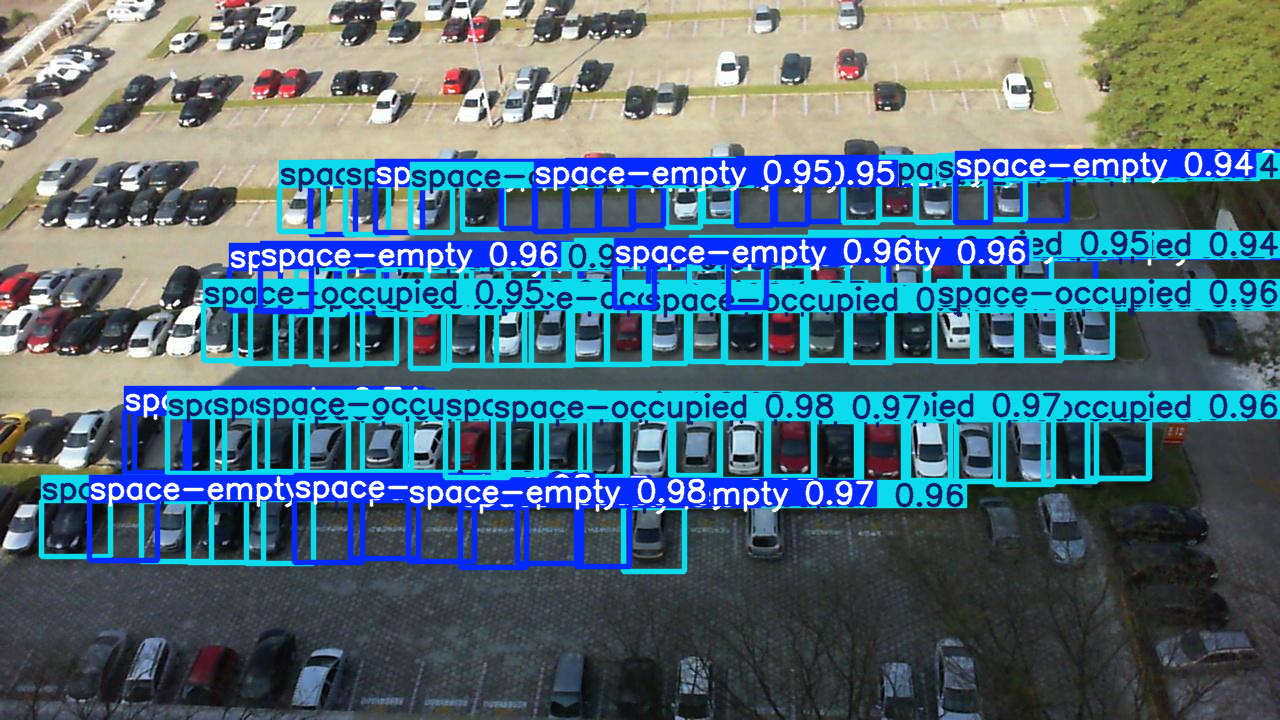

In [ ]:
results2 = det_model(img)
results2[0].show(save=True, filename='1001.png', conf=True)

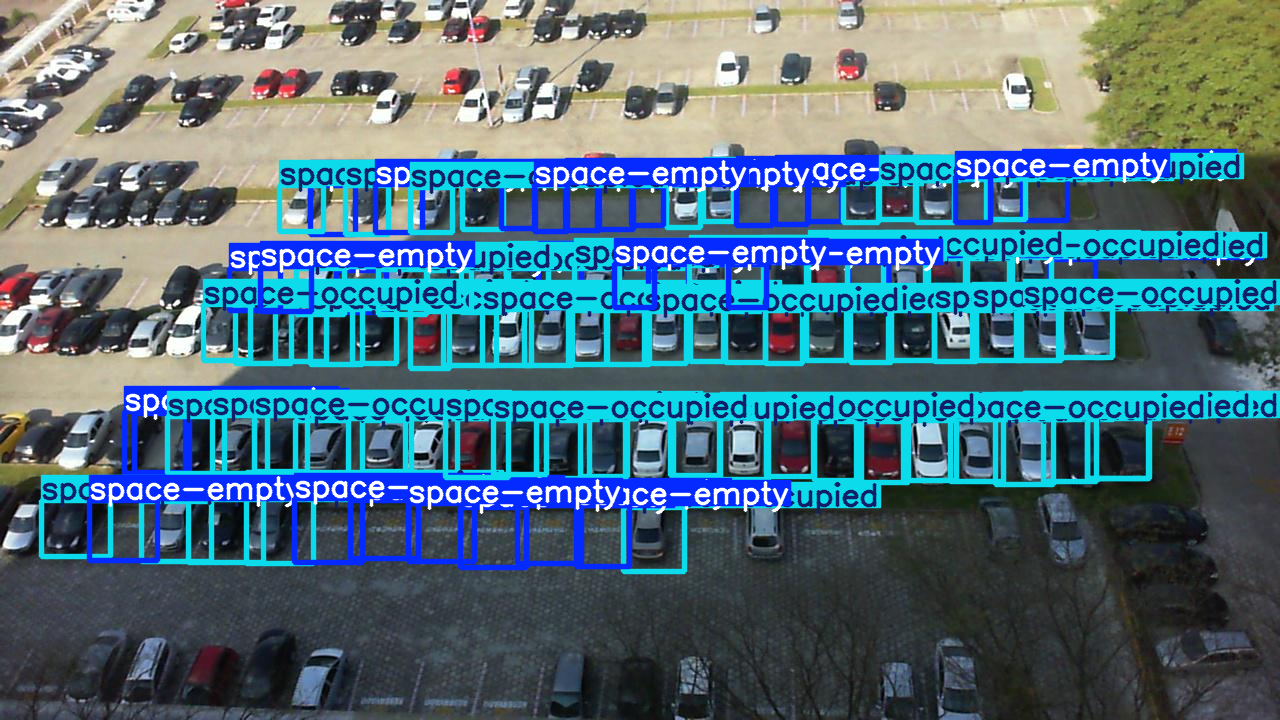

In [ ]:
#view the saved image
from IPython.display import Image
Image(filename='100.png')

In [ ]:
# Extracting details from the results
predictions = results2[0].boxes
print(predictions.xyxy)  # Bounding box coordinates
print(predictions.cls)   # Class predictions
print(predictions.conf)  # Confidence scores


tensor([[ 493.4918,  418.4392,  546.3711,  474.8422],
        [ 445.8414,  416.4580,  508.4025,  477.3159],
        [ 408.3269,  503.8840,  474.6700,  561.5318],
        [ 294.1262,  498.5914,  362.1147,  562.0215],
        [ 576.5351,  505.1786,  629.1224,  566.8710],
        [ 580.9119,  419.3620,  627.7821,  476.9717],
        [ 517.4171,  503.7930,  581.2226,  563.1358],
        [ 460.6294,  507.2914,  526.8003,  567.8946],
        [ 720.8984,  417.1510,  768.5233,  479.5543],
        [ 350.6522,  500.4675,  418.1694,  558.4403],
        [  89.4193,  500.0797,  157.5869,  560.7938],
        [ 625.4703,  418.5398,  673.2422,  481.5330],
        [ 246.0937,  495.9604,  313.9506,  563.2458],
        [ 536.7984,  420.2778,  589.6719,  478.2099],
        [ 950.9630,  418.0375, 1003.2465,  481.4609],
        [ 623.7343,  507.4440,  684.0089,  571.1574],
        [1058.4010,  304.8673, 1112.6550,  357.8434],
        [ 614.6161,  263.9471,  654.3928,  307.0360],
        [ 260.5337,  266.475

In [ ]:
!git config --global user.name "mohamadtorres"
!git config --global user.email "m.rahimi.vasteras@gmail.com"


In [ ]:
!git clone https://github.com/mohamadtorres/Parking_places.git


Cloning into 'Parking_places'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


In [8]:
#recreate the run folder
!mkdir -p /content/runs/detect/yolov10n_park_40e/

In [9]:
!cp -r /content/drive/MyDrive/yolov10n_park_40e_backup/* /content/runs/detect/yolov10n_park_40e/

In [10]:
!git clone https://github.com/mohamadtorres/Parking_places.git

# Move files to the GitHub repository
!cp -r /content/runs/detect/yolov10n_park_40e/* /content/Parking_places//

# Change directory to the repository
%cd /content/Parking_places/

# Add, commit, and push to GitHub
!git add .
!git commit -m "Add YOLOv8 training results and configurations"
!git push origin main


fatal: destination path 'Parking_places' already exists and is not an empty directory.
/content/Parking_places
[main 9947579] Add YOLOv8 training results and configurations
 66 files changed, 148 insertions(+)
 create mode 100644 F1_curve.png
 create mode 100644 PR_curve.png
 create mode 100644 P_curve.png
 create mode 100644 R_curve.png
 create mode 100644 args.yaml
 create mode 100644 confusion_matrix.png
 create mode 100644 confusion_matrix_normalized.png
 create mode 100644 events.out.tfevents.1727874238.0ca9b287cf62.307.0
 create mode 100644 labels.jpg
 create mode 100644 labels_correlogram.jpg
 create mode 100644 results.csv
 create mode 100644 results.png
 create mode 100644 train_batch0.jpg
 create mode 100644 train_batch1.jpg
 create mode 100644 train_batch15000.jpg
 create mode 100644 train_batch15001.jpg
 create mode 100644 train_batch15002.jpg
 create mode 100644 train_batch2.jpg
 create mode 100644 val_batch0_labels.jpg
 create mode 100644 val_batch0_pred.jpg
 create mode 

In [12]:
!git push origin main

Enumerating objects: 70, done.
Counting objects: 100% (70/70), done.
Delta compression using up to 2 threads
Compressing objects: 100% (69/69), done.
Writing objects: 100% (69/69), 450.57 MiB | 6.88 MiB/s, done.
Total 69 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), done.
To https://github.com/mohamadtorres/Parking_places.git
   29e6346..9947579  main -> main


In [13]:
!ls /content

drive  Parking_places  runs  sample_data


In [15]:
!ls /content/drive/MyDrive/Colab\ Notebooks

'Copy of YOLO.ipynb'   train.zip   valid.zip   YOLO.ipynb


In [16]:
!cp "/content/drive/MyDrive/Colab Notebooks/YOLO.ipynb" /content/Parking_places//


In [19]:
%cd /content/Parking_places/

# Add the notebook to GitHub
!git add YOLO.ipynb

# Commit the notebook
!git commit -m "Add Jupyter notebook for YOLOv8 project"

# Push the notebook to GitHub
!git push origin main


/content/Parking_places
On branch main
Your branch is ahead of 'origin/main' by 1 commit.
  (use "git push" to publish your local commits)

nothing to commit, working tree clean
Enumerating objects: 4, done.
Counting objects: 100% (4/4), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 2.97 MiB | 5.62 MiB/s, done.
Total 3 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
remote: error: GH013: Repository rule violations found for refs/heads/main.
remote: 
remote: - GITHUB PUSH PROTECTION
remote:   —————————————————————————————————————————
remote:     Resolve the following violations before pushing again
remote: 
remote:     - Push cannot contain secrets
remote: 
remote:     
remote:      (?) Learn how to resolve a blocked push
remote:      https://docs.github.com/code-security/secret-scanning/working-with-secret-scanning-and-push-protection/working-with-push-p

In [20]:
!git reset --soft HEAD~1

In [21]:
#readd the notebook
!git add YOLO.ipynb

In [22]:
!git commit -m "Remove secret from notebook and clean commit history"
!git push origin main --force

[main c66cbc6] Remove secret from notebook and clean commit history
 1 file changed, 1 insertion(+)
 create mode 100644 YOLO.ipynb
Enumerating objects: 4, done.
Counting objects: 100% (4/4), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 2.97 MiB | 5.36 MiB/s, done.
Total 3 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
remote: error: GH013: Repository rule violations found for refs/heads/main.
remote: 
remote: - GITHUB PUSH PROTECTION
remote:   —————————————————————————————————————————
remote:     Resolve the following violations before pushing again
remote: 
remote:     - Push cannot contain secrets
remote: 
remote:     
remote:      (?) Learn how to resolve a blocked push
remote:      https://docs.github.com/code-security/secret-scanning/working-with-secret-scanning-and-push-protection/working-with-push-protection-from-the-command-line#resolving-a-blo

In [23]:
!cp /content/data3.yaml /content/drive/MyDrive/

cp: cannot stat '/content/data3.yaml': No such file or directory
